#### See [desmos graph](https://www.desmos.com/calculator/dcwkvwvbae) for more.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
def get_u(x: float, y: float) -> float:
    if (x == 0 or y == 0):
        return math.inf
    ans = ( math.cos(math.atan(y / x)) ) / ( (x**2 + y**2) ** (1/4) )
    if (x<0):
        ans *= -1
    return ans


In [3]:
step = 5000

coords = []
u_vals = []

for i in range(step + 1):
    for j in range(step + 1):
        x = -1 + 2 * i/step
        y = -1 + 2 * j/step
        # print(f"x, y: {x:.2f}, {y:.2f}\n")
        if (math.sqrt(x**2 + y**2) <= 1):
            # coords.append([x,y])
            u = get_u(x, y)
            if (u != math.inf):
                u_vals.append(u)


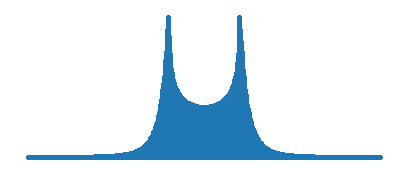

In [4]:
u_max = 5.0
u_num_bins = 500
num_points = 5000

bin_edges = np.linspace(-u_max, u_max, u_num_bins + 1)
bin_indices = np.digitize(u_vals, bin_edges) - 1

x_vals = []
y_vals = []

bin_counts = [0] * u_num_bins
for val, bin_idx in zip(u_vals, bin_indices):
    if 0 <= bin_idx < u_num_bins:
        x = (bin_edges[bin_idx] + bin_edges[bin_idx + 1]) / 2
        y = bin_counts[bin_idx]
        bin_counts[bin_idx] += 1
        x_vals.append(x)
        y_vals.append(y)

plt.figure(figsize=(5, 2))

plt.scatter(x_vals, y_vals, s=2)
plt.axis("off")
plt.show()


In [ ]:
print("test")

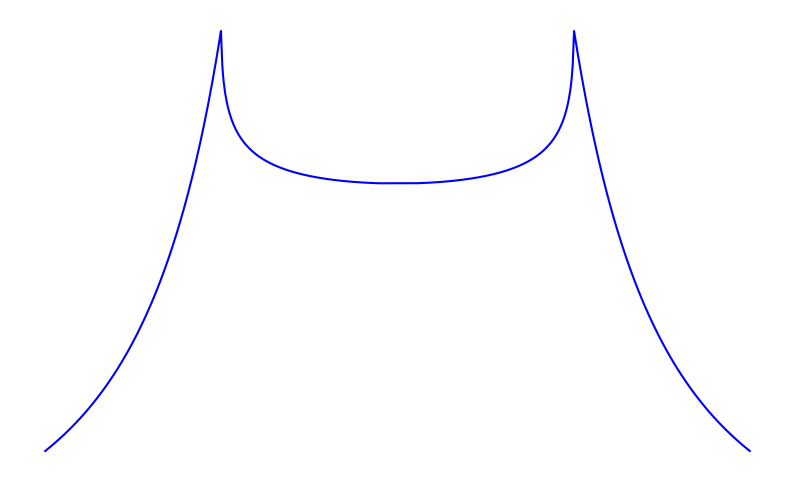

In [13]:
def arc_length(u):
    u = np.array(u)
    result = np.zeros_like(u, dtype=float)
    
    # Common constant in both branches
    common_term = (1 / (2 * np.sqrt(3))) * np.log(2 + np.sqrt(3)) + 1

    # Case 1: |u| >= 1
    mask1 = np.abs(u) >= 1
    result[mask1] = (4 / u[mask1]**2) * common_term

    # Case 2: |u| < 1
    mask2 = ~mask1
    u2 = u[mask2]  # values where |u| < 1
    sqrt_term = np.sqrt(3 * u2**4 - 7 * u2**2 + 4)
    log_term = (1 / np.sqrt(3)) * np.log(np.abs(np.sqrt(3 - 3 * u2**2) + np.sqrt(4 - 3 * u2**2)))
    inner = common_term - 0.5 * (sqrt_term + log_term)
    result[mask2] = (4 / u2**2) * inner

    return result

# Generate u values (avoid u = 0 to prevent division by zero)
u_vals = np.linspace(0.1, 2, 500)
u_vals = np.concatenate((-u_vals[::-1], u_vals))  # Include negative side symmetrically

L_vals = arc_length(u_vals)

# Plotting using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(u_vals, L_vals, label=r'$L_3(u)$', color='blue')
plt.axis("off")
plt.grid(True)
plt.show()
